In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from pandas.tools import plotting
%matplotlib inline


In [18]:
df = pd.read_csv('data/listing_formatted_hr_vol_fac_removed.csv', index_col=0)
Data_out_name = ['AC', 'kitchen', 
       'breakfast', 'fam_friendly', 'essentials','workspace',
        'food','point_of_interest', 'establishment', 'gas_station','grocery_or_supermarket', 'lodging',
        'spa', 'home_goods_store', 'real_estate_agency',
        'museum', 'moving_company',  'transit_station', 'subway_station', 'car_dealer', 'roofing_contractor', 'hit_rate','volatility']
Data_out = df[Data_out_name].dropna()
Y_data_out = Data_out[['hit_rate', 'volatility']]
X_data_out = Data_out[Data_out_name[:-2]]

/Users/Xinhui/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Hit Ratio Regression

In [38]:
model = sm.OLS(Y_data_out['hit_rate'],sm.add_constant(X_data_out))
olsres = model.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:               hit_rate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     43.84
Date:                Sat, 09 Sep 2017   Prob (F-statistic):          1.36e-160
Time:                        14:30:29   Log-Likelihood:                -6535.0
No. Observations:               18439   AIC:                         1.311e+04
Df Residuals:                   18419   BIC:                         1.327e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
AC                         0

## Remove insignificant variable

In [42]:
df = pd.read_csv('data/listing_formatted_hr_vol_fac_removed.csv', index_col=0)
Data_out_name = ['AC', 'kitchen', 
       'breakfast', 'fam_friendly', 'essentials','workspace','point_of_interest', 'establishment', 'gas_station','grocery_or_supermarket',
         'home_goods_store', 'real_estate_agency',
        'museum', 'moving_company',  'transit_station', 'subway_station', 'roofing_contractor', 'hit_rate','volatility']
Data_out = df[Data_out_name].dropna()
Y_data_out = Data_out[['hit_rate', 'volatility']]
X_data_out = Data_out[Data_out_name[:-2]]
model = sm.OLS(Y_data_out['hit_rate'],sm.add_constant(X_data_out))
olsres = model.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:               hit_rate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     55.28
Date:                Sat, 09 Sep 2017   Prob (F-statistic):          3.17e-163
Time:                        14:32:57   Log-Likelihood:                -6536.9
No. Observations:               18439   AIC:                         1.311e+04
Df Residuals:                   18423   BIC:                         1.323e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
AC                         0

/Users/Xinhui/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
Data_out_name = ['AC', 'kitchen', 'point_of_interest', 'establishment', 'grocery_or_supermarket', 'hit_rate','volatility']
Data_out = df[Data_out_name].dropna()
X_data_out = Data_out[Data_out_name[:-2]]

/Users/Xinhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.
/Users/Xinhui/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/Xinhui/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120a79d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121479630>]], dtype=object)

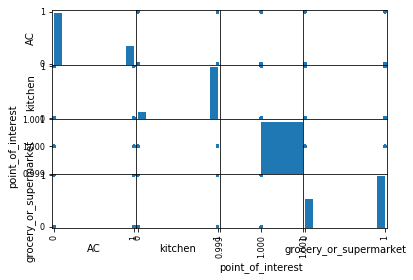

In [7]:
plotting.scatter_matrix(X_data_out) 

In [9]:
import seaborn

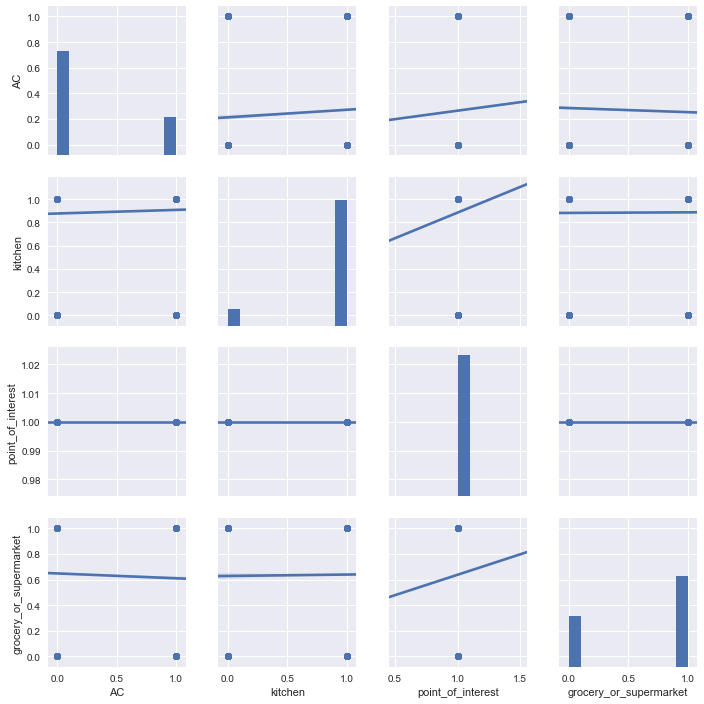

In [10]:
seaborn.pairplot(X_data_out, vars=['AC', 'kitchen', 'point_of_interest', 'grocery_or_supermarket'], kind='reg')  

In [11]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

In [21]:
def radar_factory(num_vars, frame='circle'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}

    def unit_poly_verts(theta):
        x0, y0, r = [0.5] * 3
        verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
        return verts

    class RadarAxes(PolarAxes):

        name = 'radar'
        RESOLUTION = 1
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


In [23]:
N = 5
theta = radar_factory(N, frame='polygon')
theta

array([ 1.57079633,  2.82743339,  4.08407045,  5.34070751,  6.59734457])

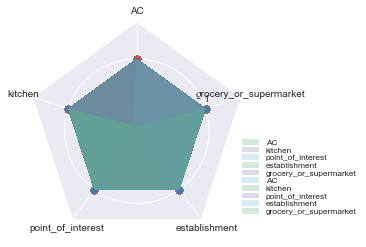

In [41]:

fig, ax = plt.subplots(subplot_kw=dict(projection='radar'))

#colors = ['b', 'r', 'g', 'm', 'y']
#markers = ["s", "o","P", "*", "^"]
ax.set_rgrids([1])

for i,(col, row) in enumerate(X_data_out.iterrows()):
    ax.scatter(theta, row, label=col)
    ax.fill(theta, row,alpha=0.25)
ax.set_varlabels(X_data_out.columns)

labels = ['AC', 'kitchen', 'point_of_interest', 'establishment', 'grocery_or_supermarket']
ax.legend(labels*2, loc=(0.97, .1), labelspacing=0.1, fontsize='small')

plt.show()

In [37]:
X_data_out.index

Int64Index([    1,     2,     3,     4,     6,     7,     8,    10,    11,
               12,
            ...
            24299, 24300, 24301, 24302, 24303, 24304, 24305, 24306, 24307,
            24308],
           dtype='int64', length=18439)

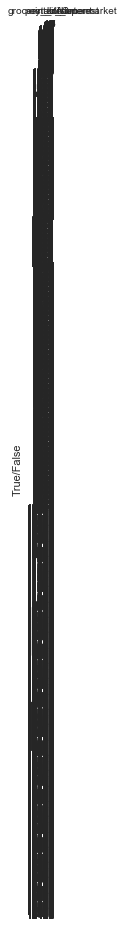

In [42]:
plt.matshow(X_data_out, cmap="gray")
plt.xticks(range(len(X_data_out.columns)), X_data_out.columns)
plt.yticks(range(len(X_data_out)), range(1,len(X_data_out)+1))
plt.ylabel("True/False")     
plt.show()   
